In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Data Exploration


In [ ]:
#load data
df = pd.read_csv("housing.csv")
print('# of features in dataset = ',df.shape[1]) #number of features
df.describe() #general description of the dataset

# of features in dataset =  10


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum() #checking if we have any empty values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df = df.drop(columns = ["ocean_proximity"]) #removing ocean_proximity column since it's text based
df = df.dropna() #removing any row that has missing values

# Data Splitting

In [ ]:
#spliting original data for trianing and tesitng
features = df.drop(columns=['median_house_value']) #storing features values
targets = df['median_house_value'] #storing targets values
X_train_total, X_test, y_train_total, y_test = train_test_split(features, targets, test_size=0.2, random_state=0) #splitting the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_total, y_train_total, test_size=0.2, random_state=0) #splitting the training set into training and validation

# Training and Tuning a Model without Standardization or Cross Validation

In [ ]:
#without standardization
#initialize array for value storage
k_values = list(range(1, 31)) #values for k to be tried
MSE_val_noSC = []
MSE_train_noSC = []
best_MSE_noCV_noSC = 100000000000000000000
best_k_noCV_noSC = 0
#iterate through hyperparameters
for k in k_values:
  #declare and fit the model
  neigh_a = neighbors.KNeighborsRegressor(n_neighbors = k)
  neigh_a.fit(X_train, y_train)
  #make prediction
  prediction_val_noSC = neigh_a.predict(X_val)
  prediction_train_noSC = neigh_a.predict(X_train)

  #collecting the error term
  current_MSE = mean_squared_error(y_val,prediction_val_noSC)
  current_MSE_t = mean_squared_error(y_train,prediction_train_noSC)
  MSE_val_noSC.append(current_MSE)
  MSE_train_noSC.append(current_MSE_t)
  #getting the best mse and best k
  if best_MSE_noCV_noSC > current_MSE:
    best_MSE_noCV_noSC = current_MSE
    best_k_noCV_noSC = k

print("Best k without cross-validation:", best_k_noCV_noSC)

Best k without cross-validation: 22


# Training and Tuning a Model after Standardization without Cross Validation

In [ ]:
#declare standard scaler
scaler_a = StandardScaler()
scaler_a.fit(X_train)
#transform data
X_train_sc = scaler_a.transform(X_train)
X_val_sc = scaler_a.transform(X_val)
X_test_sc = scaler_a.transform(X_test)
#transform data
scaler_b = StandardScaler()
scaler_b.fit(X_train_total)
X_train_total_sc = scaler_b.transform(X_train_total)
X_test_total_sc = scaler_b.transform(X_test)

In [ ]:
MSE_val_sc = []
MSE_train_sc = []
best_MSE_noCV = 100000000000000000000
best_k_noCV = 0
#iterate through hyperparameters
for k in k_values:
  neigh_b = neighbors.KNeighborsRegressor(n_neighbors = k) #declare the model
  neigh_b.fit(X_train_sc, y_train) #fit the model

  prediction_val_sc = neigh_b.predict(X_val_sc) #predict
  prediction_train_sc = neigh_b.predict(X_train_sc)
  #collect error term
  current_MSE = mean_squared_error(y_val,prediction_val_sc)
  current_MSE_t = mean_squared_error(y_train,prediction_train_sc)

  MSE_val_sc.append(current_MSE)
  MSE_train_sc.append(current_MSE_t)
  #getting the best mse and best k
  if best_MSE_noCV > current_MSE:
    best_MSE_noCV = current_MSE
    best_k_noCV = k
print("Best validation MSE without cross-validation:", best_MSE_noCV)
print("Best k without cross-validation:", best_k_noCV)

Best validation MSE without cross-validation: 3816243898.4439645
Best k without cross-validation: 12


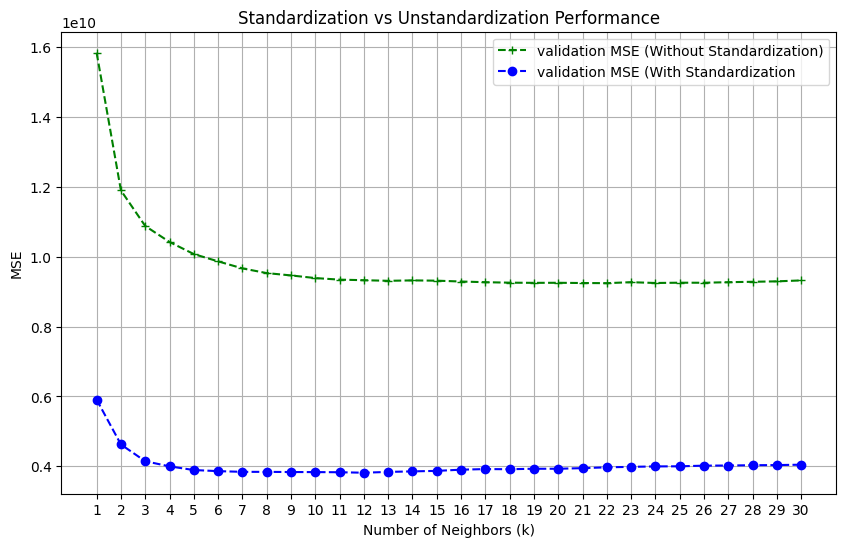

In [ ]:
#plotting the difference between test accuracy of non standardized data and standardized data using holdout method

plt.figure(figsize=(10, 6))
plt.plot(k_values, MSE_val_noSC, marker='+', linestyle='--', color='g', label='validation MSE (Without Standardization)')
plt.plot(k_values, MSE_val_sc, marker='o', linestyle='--', color='b', label='validation MSE (With Standardization')
plt.title('Standardization vs Unstandardization Performance')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('MSE')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

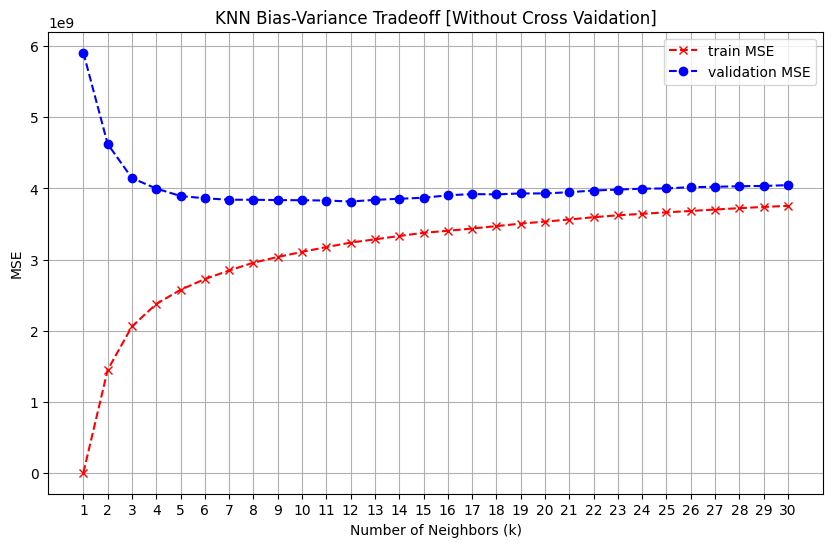

In [ ]:
#ploting the training score and validation MSE score for holdout method

plt.figure(figsize=(10, 6))
plt.plot(k_values, MSE_train_sc, marker='x', linestyle='--', color='r', label='train MSE')
plt.plot(k_values, MSE_val_sc, marker='o', linestyle='--', color='b', label='validation MSE')
plt.title('KNN Bias-Variance Tradeoff [Without Cross Vaidation]')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('MSE')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Performing Cross Validation

In [ ]:
best_MSE = 100000000000000000000
best_k = 0
MSE_val_cv = []
MSE_train_cv = []
#iterate through hyperparameters
for k in k_values:
  neigh_c = neighbors.KNeighborsRegressor(n_neighbors = k)
  scores = cross_validate(neigh_c, X_train_total_sc, y_train_total, cv=5,scoring ="neg_mean_squared_error",return_train_score=True)
  #the score funciton is negative MSE, *-1 to get positive MSE for presentation
  current_MSE_cv = scores['test_score'].mean() *-1
  current_MSE_cv_t = scores['train_score'].mean() *-1

  #getting the best mse and best k
  MSE_val_cv.append(current_MSE_cv)
  MSE_train_cv.append(current_MSE_cv_t)
  if best_MSE > current_MSE_cv:
    best_MSE = current_MSE_cv
    best_k = k
print("Best validation MSE with cross-validation:", best_MSE)
print("Best k with cross-validation:", best_k)

Best validation MSE with cross-validation: 3818389566.2980905
Best k with cross-validation: 9


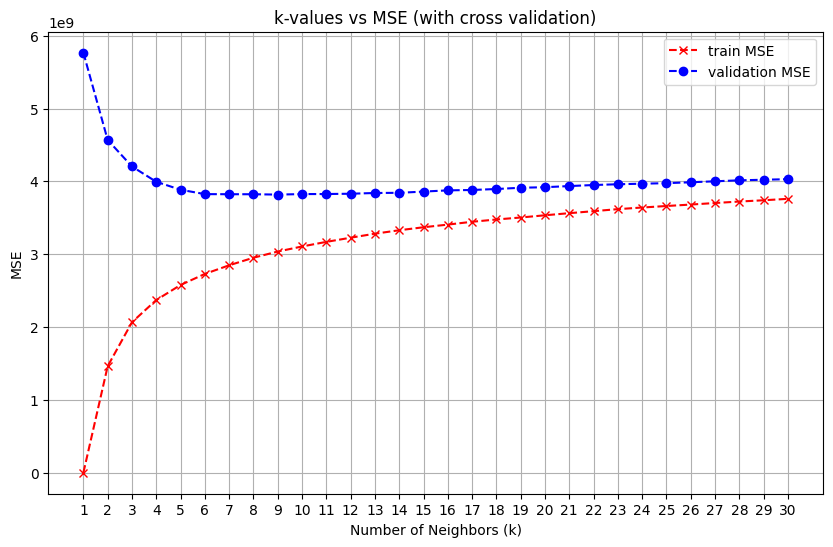

In [ ]:
#plotting the Bias Variance tradeoff using Mean Training and Mean Validation Accuracy obtained from Cross Validation
plt.figure(figsize=(10, 6))
plt.plot(k_values, MSE_train_cv, marker='x', linestyle='--', color='r', label='train MSE')
plt.plot(k_values, MSE_val_cv, marker='o', linestyle='--', color='b', label='validation MSE')
plt.title('k-values vs MSE (with cross validation)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('MSE')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

**Print MSE Value for best k value from cross validation test on unseen non-standardized data**












In [ ]:
#without standardization for holdout
#declare and fit the model with best k parameters
neigh_d = neighbors.KNeighborsRegressor(n_neighbors = best_k_noCV_noSC)

neigh_d.fit(X_train, y_train)
#make prediction and printout best k
prediction_d = neigh_d.predict(X_test)
best_MSE_noCV_noSC_test = mean_squared_error(y_test,prediction_d)
print("MSE value for test + no std + holdout: ", best_MSE_noCV_noSC_test)

MSE value for test + no std + holdout:  9078548544.383791


**Print MSE Value for best k value tune from holdout, test on unseen standardized data**












In [ ]:
#With Standardization for holdout
#declare and fit the model with best k parameters
neigh_e = neighbors.KNeighborsRegressor(n_neighbors = best_k_noCV)
neigh_e.fit(X_train_sc, y_train)
#make prediction and printout best k
prediction_e = neigh_e.predict(X_test_sc)
best_MSE_noCV_test = mean_squared_error(y_test,prediction_e)
print("MSE value for test + std + holdout: ", best_MSE_noCV_test)

MSE value for test + std + holdout:  3882647924.396078


**Print MSE Value for best k value tune from cross validation test on unseen standardized data**












In [ ]:
#with standardization for CV
neigh_f = neighbors.KNeighborsRegressor(n_neighbors = best_k)
#declare and fit the model with best k parameters
neigh_f.fit(X_train_total_sc, y_train_total)
#make prediction and printout best
prediction_f = neigh_f.predict(X_test_total_sc)
best_MSE_test = mean_squared_error(y_test,prediction_f)
print("MSE value for test + std + cv: ", best_MSE_test)

MSE value for test + std + cv:  3839934272.6308017


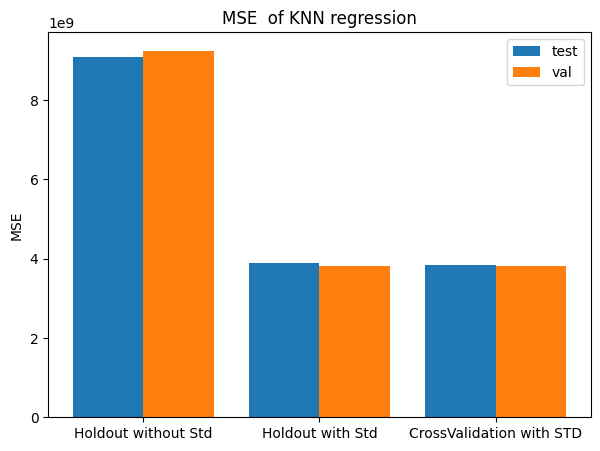

In [ ]:
#test data
test_data = {'Holdout Test without std':best_MSE_noCV_noSC_test, 'Holdout with std ':best_MSE_noCV_test, 'CV with std': best_MSE_test}
#validation data
val_data = {'Holdout Test without std' :best_MSE_noCV_noSC, 'Holdout with std':best_MSE_noCV,'CV with std': best_MSE}

#declare x axis label

X = ['Holdout without Std','Holdout with Std','CrossValidation with STD']

X_axis = np.arange(len(X))

#prepare data for plotting
#Model = list(test_data.keys())
#model1 = list(val_data.keys())
mse_test = list(test_data.values())
mse_val = list(val_data.values())

# creating the bar plot
fig = plt.figure(figsize = (7, 5))
plt.bar(X_axis - 0.2, mse_test, 0.4, label = 'test')
plt.bar(X_axis + 0.2, mse_val, 0.4, label = 'val')

#add option
plt.xticks(X_axis, X)
plt.legend()

plt.ylabel("MSE")
plt.title("MSE  of KNN regression")
plt.show()